# **Custom metric evaluation**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import plots
import constants

## **Constants**

In [2]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
DEFAULT_PARAMS_MODEL_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_transformer.csv')
MARIAN_RNN_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_RNN.csv')
LAST_MODELS_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'last_results.csv')

In [3]:
dataset_transformer = pd.read_csv(DEFAULT_PARAMS_MODEL_RESULTS)
dataset_transformer.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
37,2023-06-20 19:31:35.051751,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,180,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,190,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,190,{'train-sets': ['/docker/home/marianmt/artifac...
40,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,200,{'train-sets': ['/docker/home/marianmt/artifac...
41,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [4]:
dataset_RNN = pd.read_csv(MARIAN_RNN_RESULTS)
dataset_RNN.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
35,2023-06-21 00:24:07.249696,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,180,{'train-sets': ['/docker/home/marianmt/artifac...
36,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,190,{'train-sets': ['/docker/home/marianmt/artifac...
37,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,190,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,200,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [5]:
def plot_metrics(df, title, column, ax):
    sns.lineplot(data=df, x="epoch", y=column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(title)

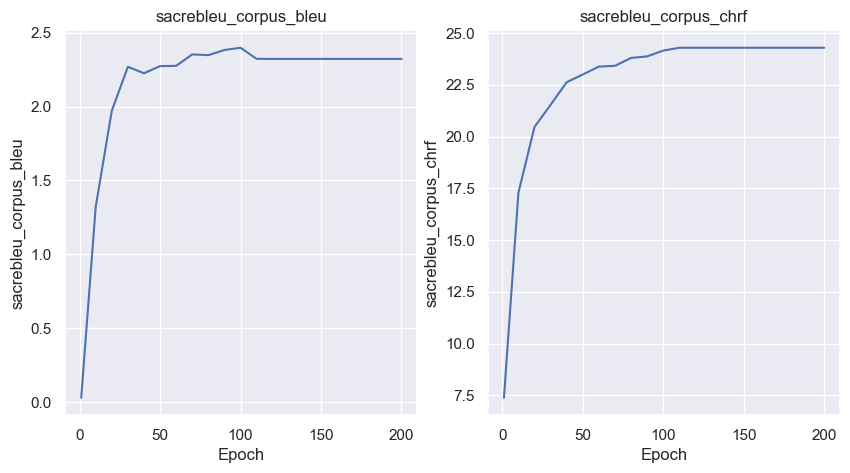

Maximum sacrebleu_corpus_bleu score: 2.3976187103216398
Maximum sacrebleu_corpus_chrf score: 24.287167745877383


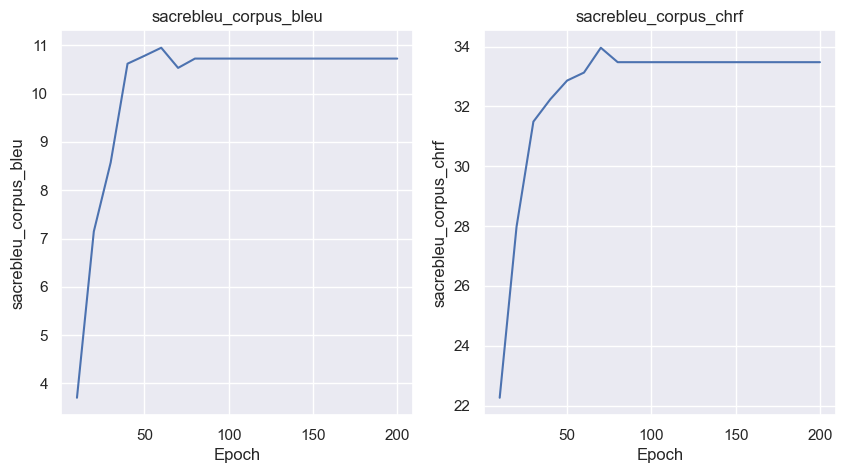

Maximum sacrebleu_corpus_bleu score: 10.948306278543276
Maximum sacrebleu_corpus_chrf score: 33.95939658753564


In [6]:
for dataset in [dataset_transformer, dataset_RNN]:
    score_types = dataset['score_type'].unique()
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(1, len(score_types), figsize=(10, 5))
    for idx, metric in enumerate(score_types):
        plot_metrics(
            dataset[dataset['score_type'] == metric],
            metric,
            'score',
            ax[idx],
        )
    plt.show(block=False)

    for idx, metric in enumerate(score_types):
        print(f'Maximum {metric} score: ', end='')
        print(max(dataset[dataset['score_type'] == metric]['score']))

## **Latest results**

In [7]:
results_df = plots.create_df_from_results_csv(LAST_MODELS_RESULTS)

In [8]:
results_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
959,2023-07-14 15:36:46.271425,gn_es_scored_june_sp16_length200.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,44.786971,180,"{'max-length': ['200'], 'train-sets': ['/docke..."
960,2023-07-14 15:38:17.756529,gn_es_scored_june_sp16_length200.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,22.546039,190,"{'max-length': ['200'], 'train-sets': ['/docke..."
961,2023-07-14 15:38:17.756529,gn_es_scored_june_sp16_length200.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,44.786971,190,"{'max-length': ['200'], 'train-sets': ['/docke..."
962,2023-07-14 15:39:50.375256,gn_es_scored_june_sp16_length200.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,22.546039,200,"{'max-length': ['200'], 'train-sets': ['/docke..."
963,2023-07-14 15:39:50.375256,gn_es_scored_june_sp16_length200.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,44.786971,200,"{'max-length': ['200'], 'train-sets': ['/docke..."


**Extract columns from parameters**

In [9]:
def add_col_from_params(df: pd.DataFrame, col_name, col_value, param_name):
    df.loc[df['parameters'].str.contains(param_name, regex=False), col_name] = col_value
    return df

**Model architecture**

In [10]:
results_df['model_type'] = 'amun'
model_format = "['{}']"
results_df = add_col_from_params(results_df, 'model_type', 'transformer', model_format.format('transformer'))
results_df = add_col_from_params(results_df, 'model_type', 's2s', model_format.format('s2s'))

In [11]:
results_df['model_type'].value_counts()

transformer    518
amun           284
s2s            162
Name: model_type, dtype: int64

**Visual analysis**

In [12]:
gn_es_results = results_df[results_df['source'].str.contains('gn', regex=False)]
es_gn_results = results_df[results_df['source'].str.contains('es', regex=False)]

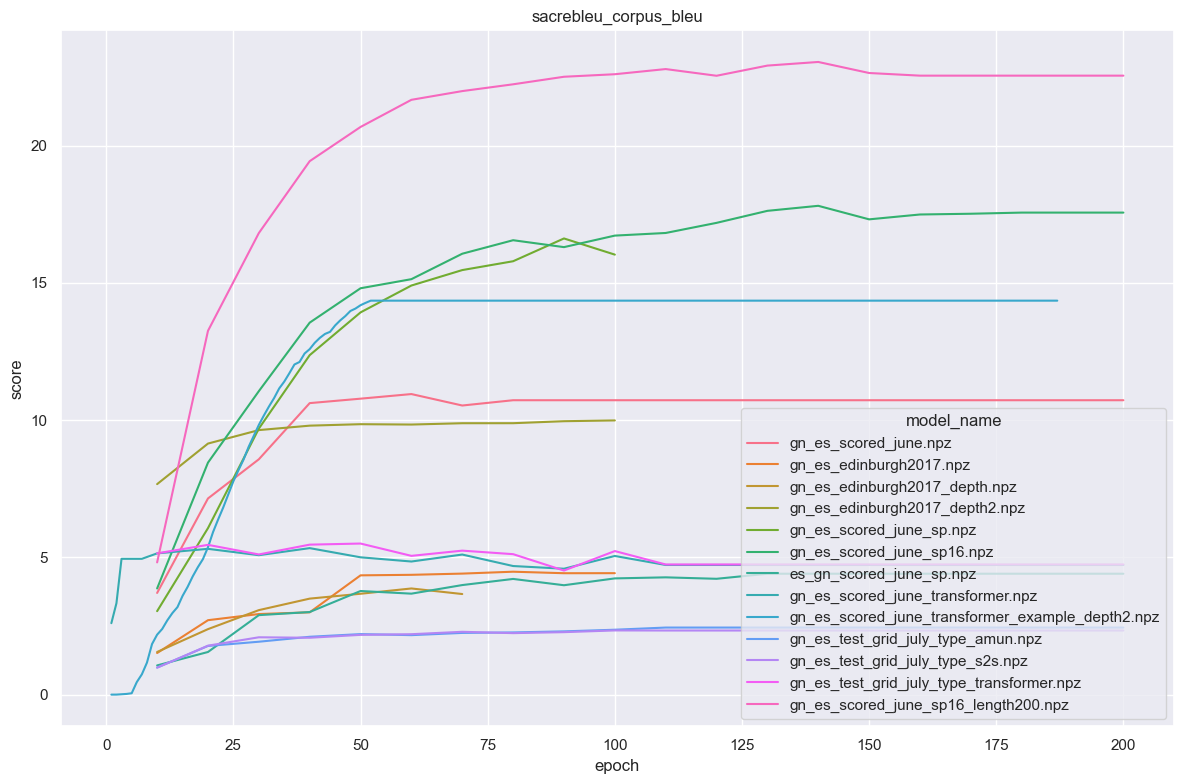

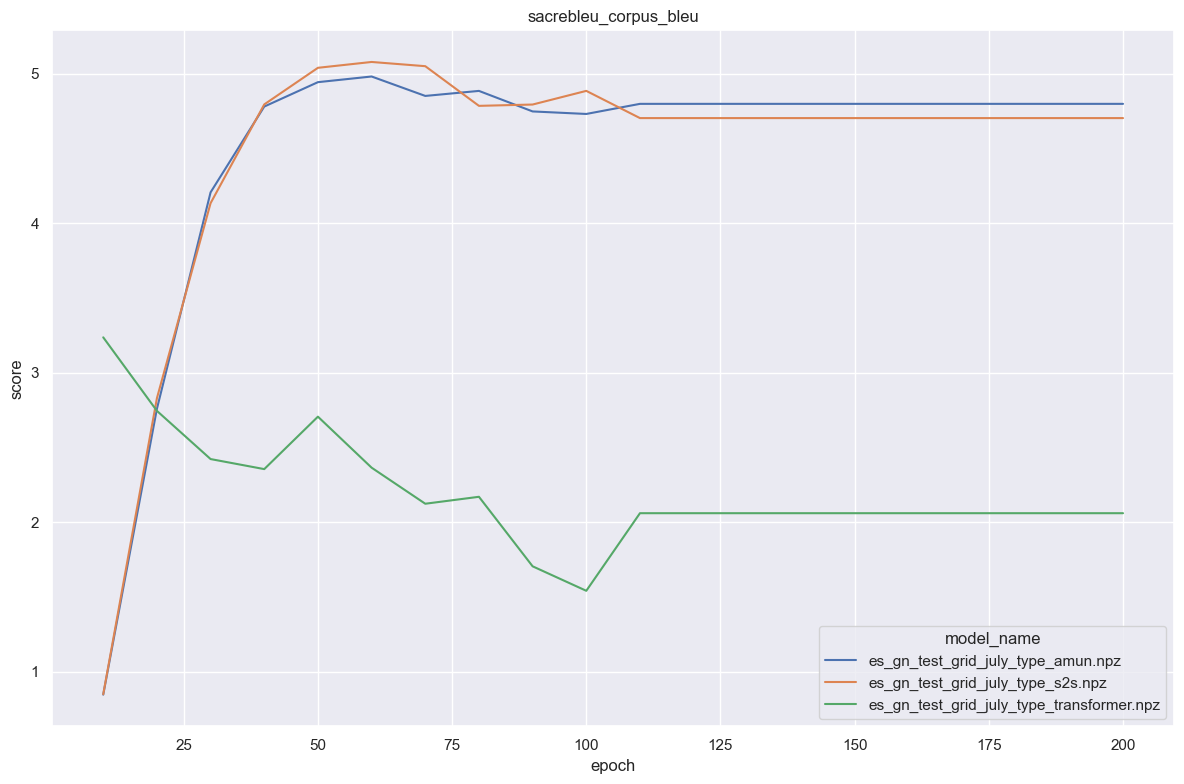

In [13]:
plots.plot_metric_by_epoch_foreach_model(gn_es_results, metric='sacrebleu_corpus_bleu');
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_bleu');

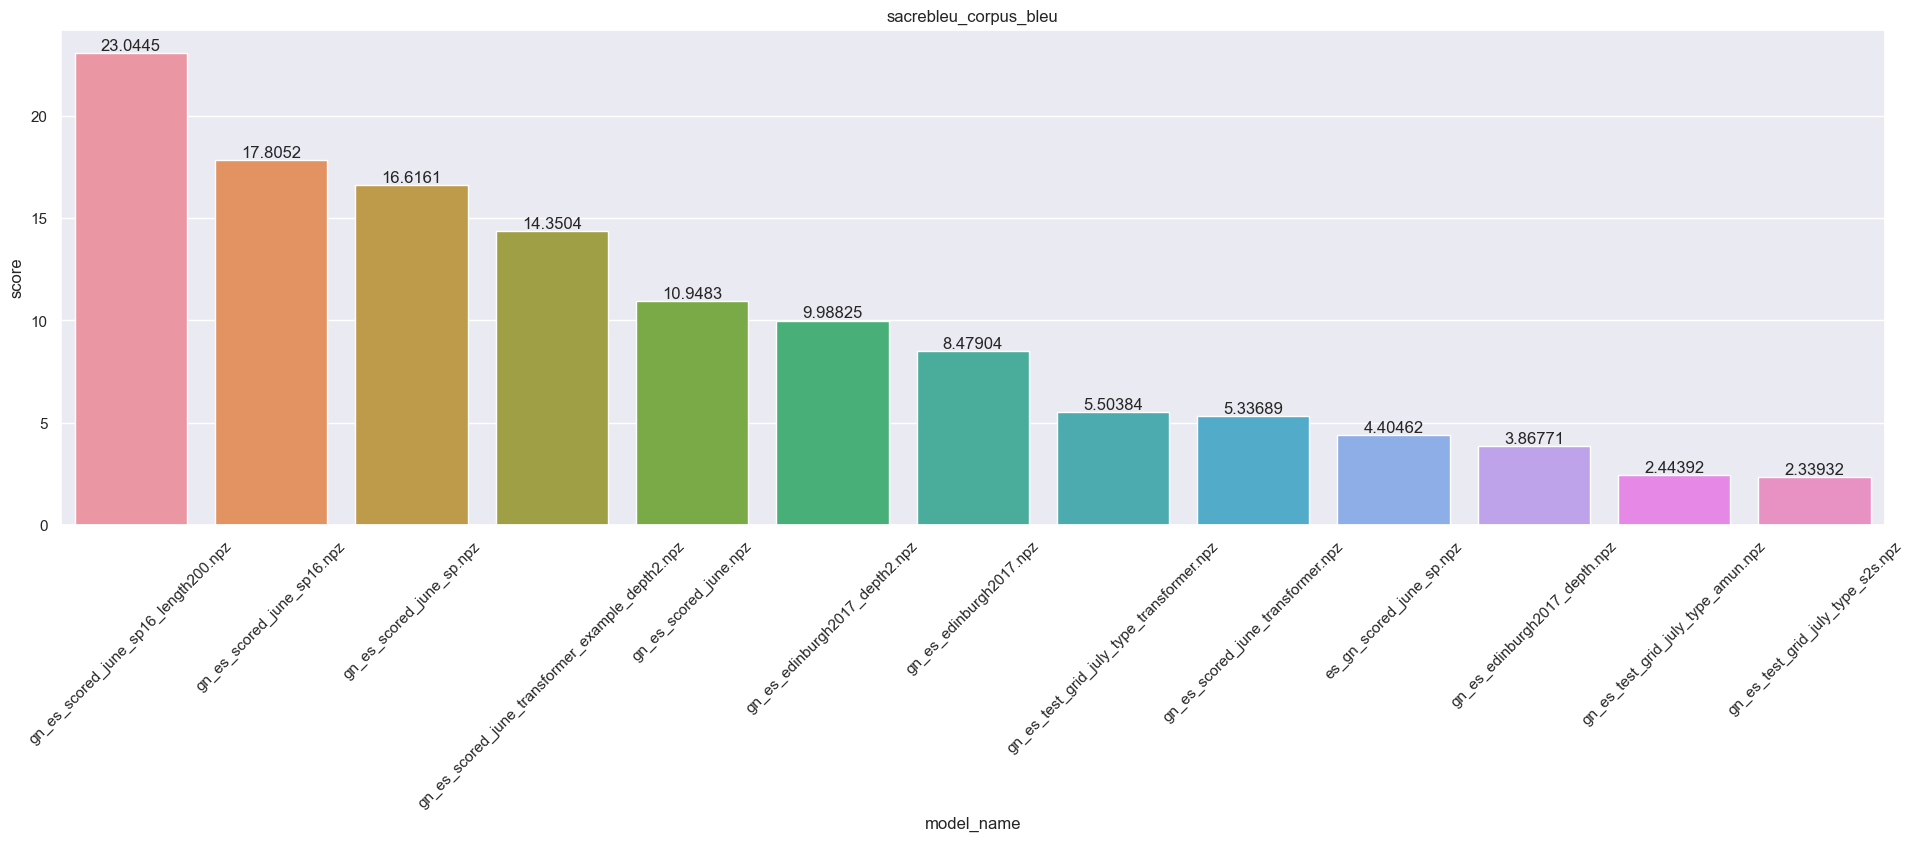

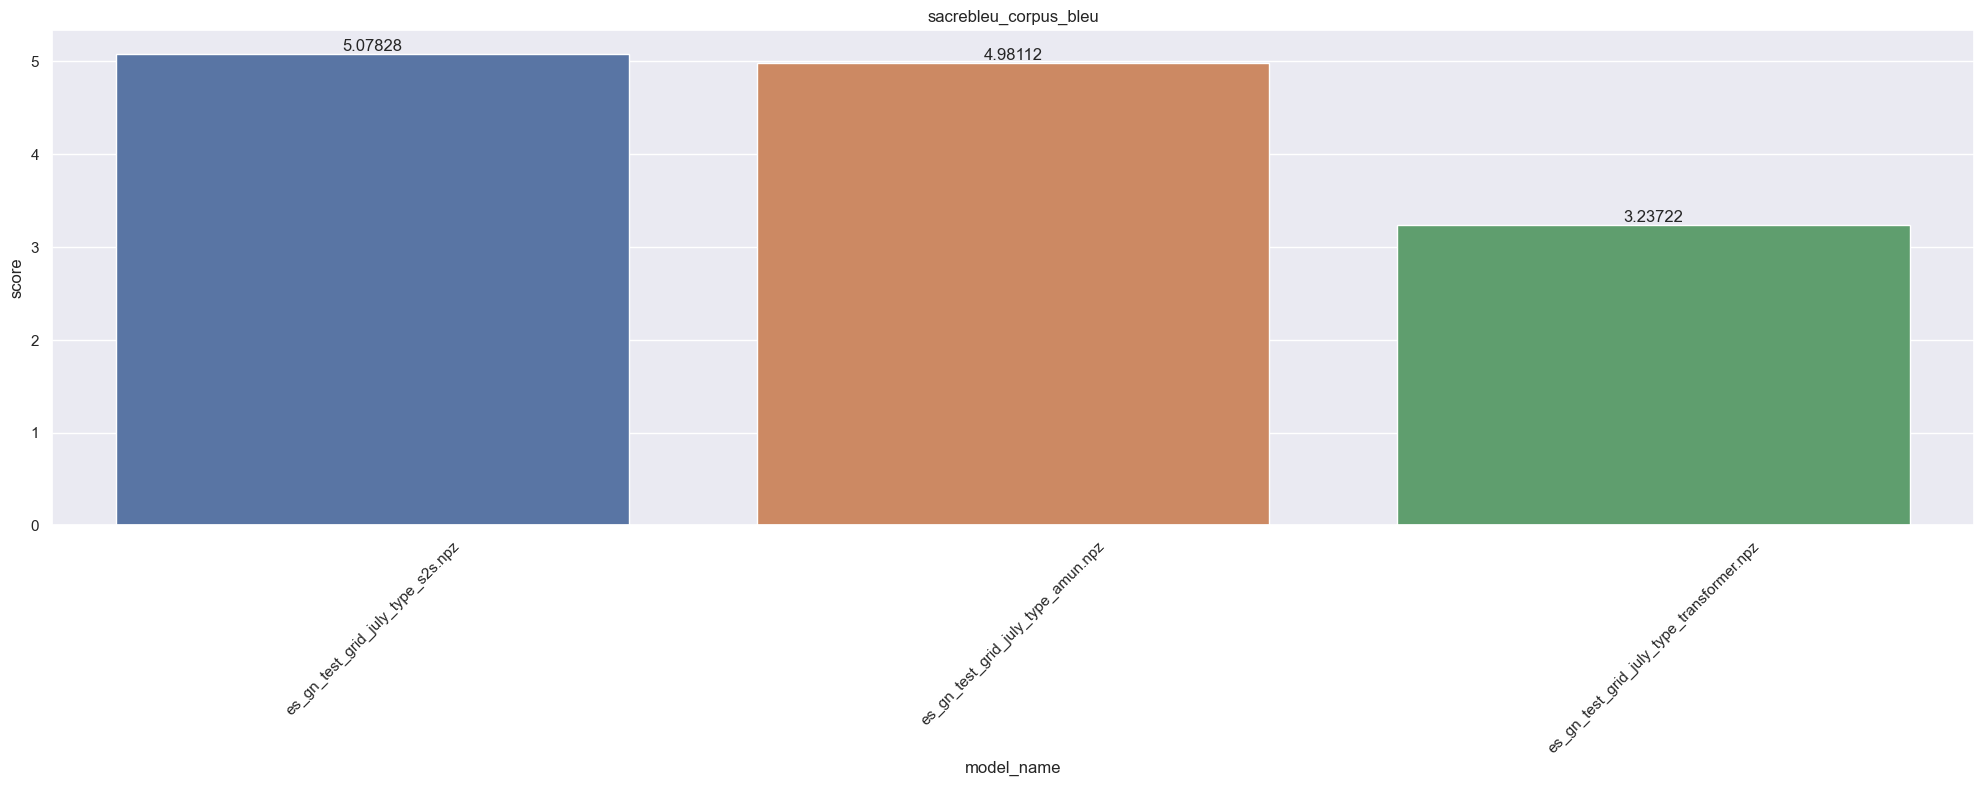

In [14]:
plots.plot_max_score_by_model(gn_es_results, metric='sacrebleu_corpus_bleu');
plots.plot_max_score_by_model(es_gn_results, metric='sacrebleu_corpus_bleu');

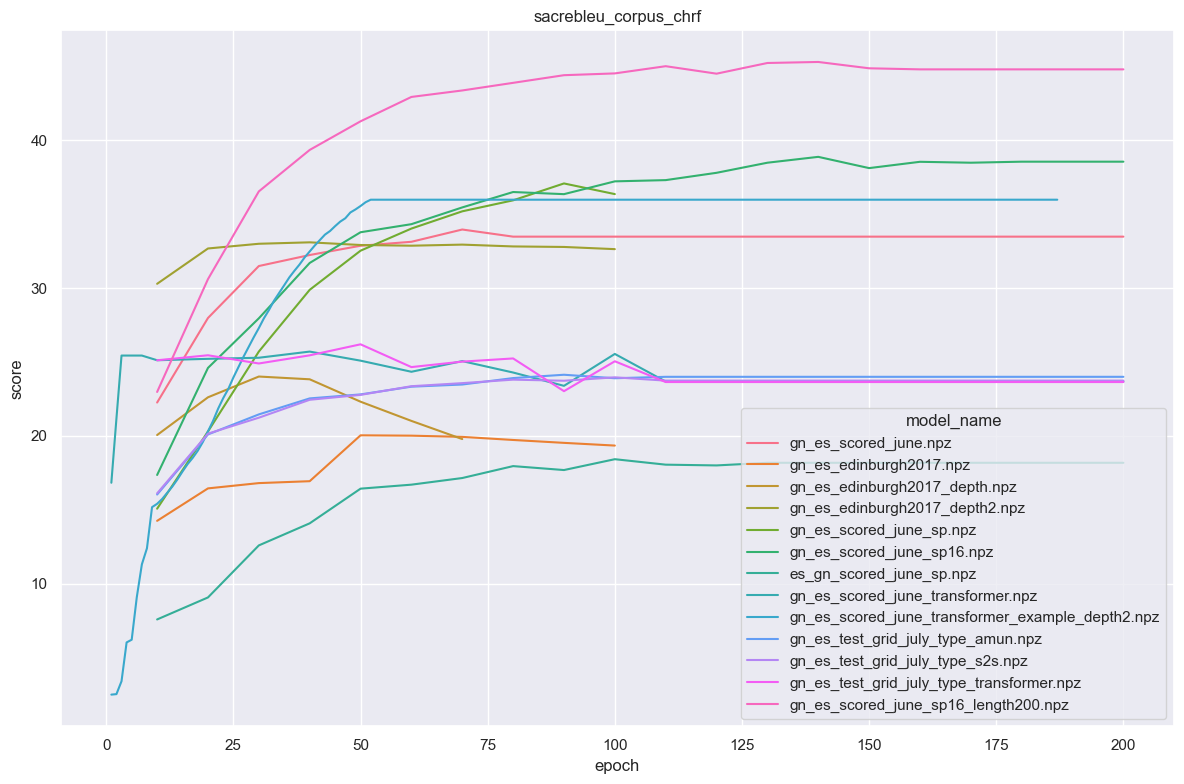

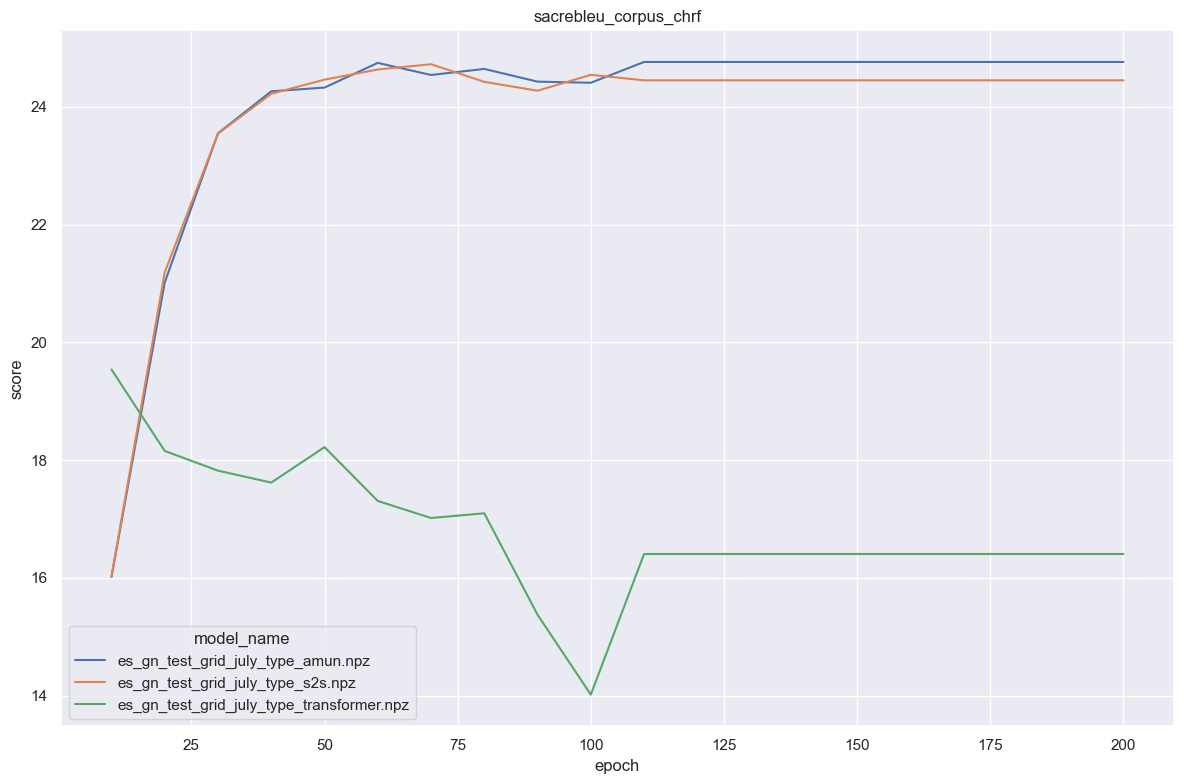

In [15]:
plots.plot_metric_by_epoch_foreach_model(gn_es_results, metric='sacrebleu_corpus_chrf');
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_chrf');

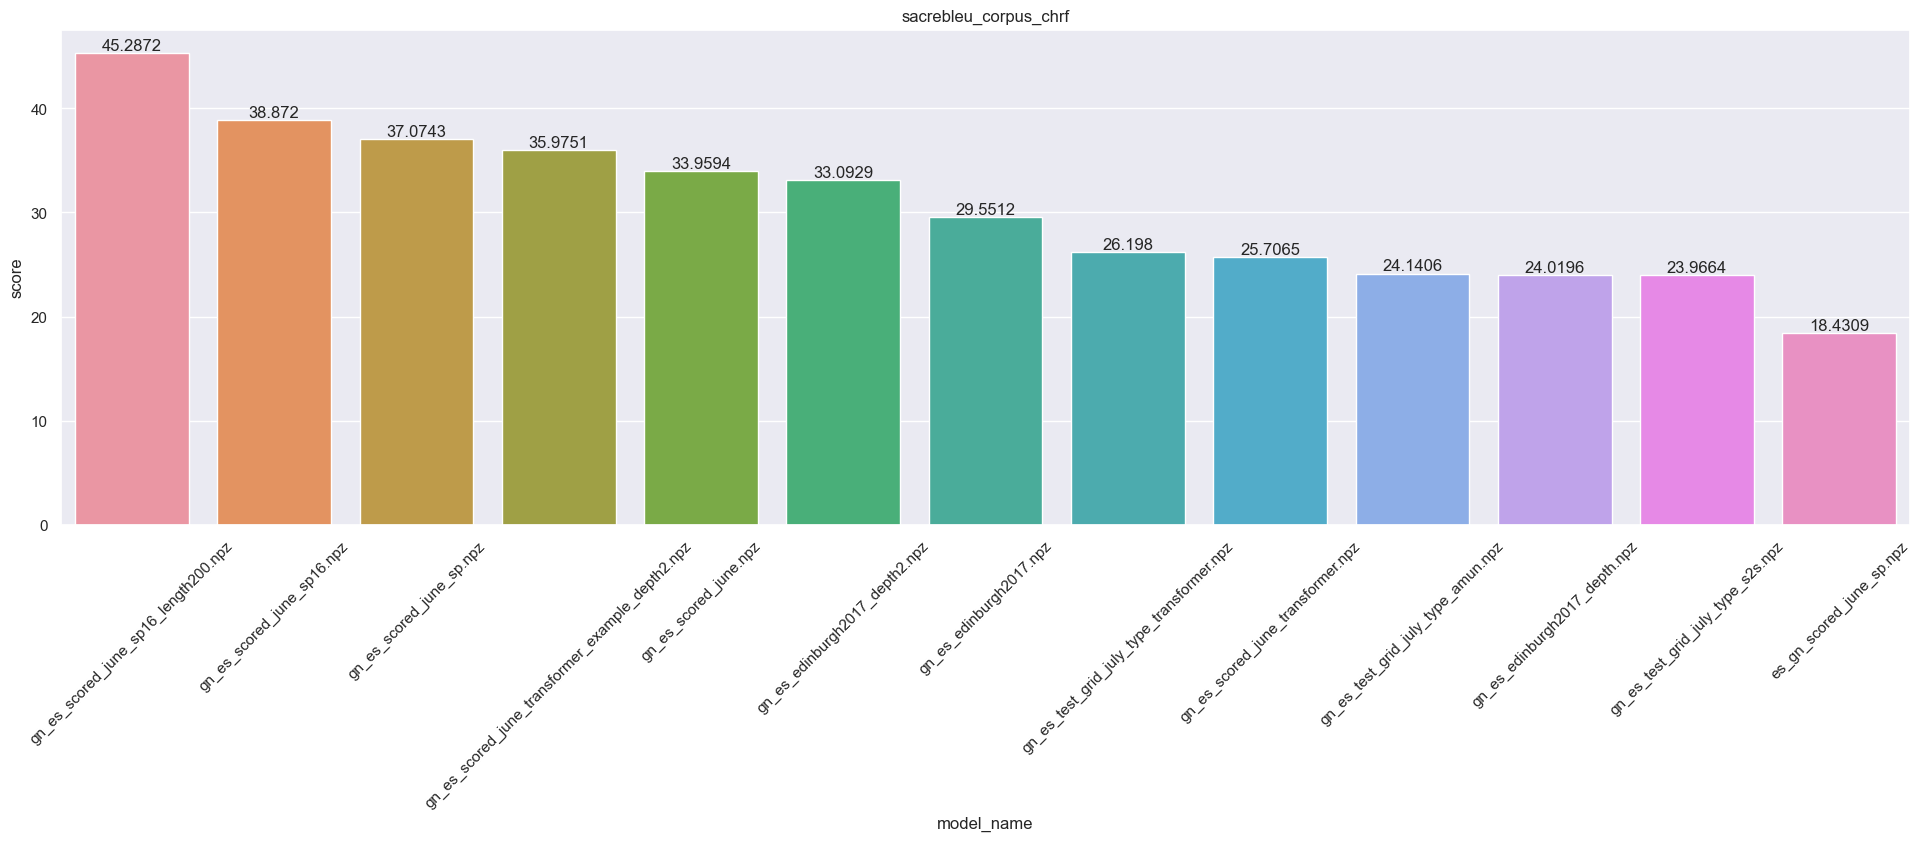

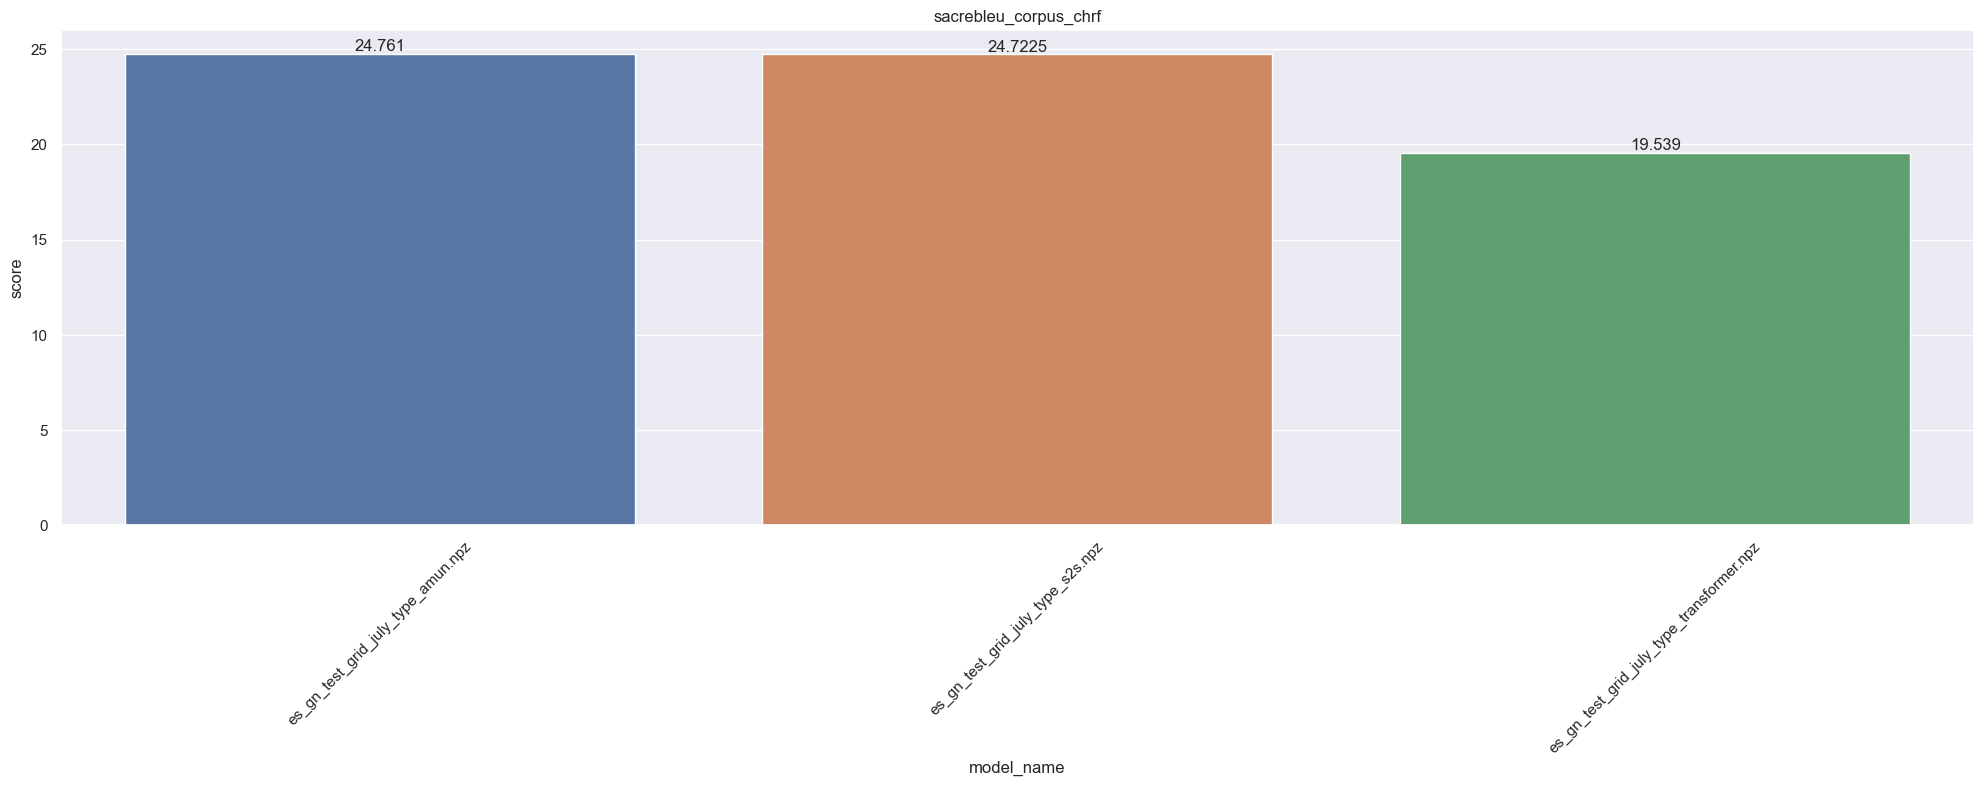

In [16]:
plots.plot_max_score_by_model(gn_es_results, metric='sacrebleu_corpus_chrf');
plots.plot_max_score_by_model(es_gn_results, metric='sacrebleu_corpus_chrf');